In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [143]:
df=pd.read_csv('datasets/bikes.csv')
bike_df = df.copy()

In [144]:
bike_df.head()

datetime  season  holiday  workingday weather  temp  humidity  \
0  2011-01-01 00:00:00  Spring      0.0         0.0   Clear  9.84      81.0   
1  2011-01-01 01:00:00  Spring      0.0         0.0     NaN  9.02      80.0   
2  2011-01-01 02:00:00  Spring      0.0         0.0   Clear  9.02       NaN   
3  2011-01-01 03:00:00  Spring      0.0         0.0   Clear  9.84      75.0   
4  2011-01-01 04:00:00     NaN      0.0         0.0   Clear   NaN      75.0   

   windspeed  casual  registered  rented_bikes_count  
0        NaN       3          13                  16  
1        0.0       8          32                  40  
2        0.0       5          27                  32  
3        0.0       3          10                  13  
4        NaN       0           1                   1

In [145]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [146]:
bike_df.describe(include='all')

datetime  season       holiday   workingday weather  \
count                 10886   10672  10030.000000  9388.000000    8746   
unique                10886       4           NaN          NaN       4   
top     2011-07-14 07:00:00  Winter           NaN          NaN   Clear   
freq                      1    2688           NaN          NaN    5793   
mean                    NaN     NaN      0.029113     0.678206     NaN   
std                     NaN     NaN      0.168131     0.467189     NaN   
min                     NaN     NaN      0.000000     0.000000     NaN   
25%                     NaN     NaN      0.000000     0.000000     NaN   
50%                     NaN     NaN      0.000000     1.000000     NaN   
75%                     NaN     NaN      0.000000     1.000000     NaN   
max                     NaN     NaN      1.000000     1.000000     NaN   

               temp     humidity    windspeed        casual    registered  \
count   8104.000000  7462.000000  6820.000000  10886.000000  10886.000000   
unique          NaN          NaN          NaN           NaN           NaN   
top             NaN          NaN          NaN           NaN           NaN   
freq            NaN          NaN          NaN           NaN           NaN   
mean      20.317665    61.790673    12.708806     36.021955    155.552177   
std        7.818568    19.262084     8.131154     49.960477    151.039033   
min        0.820000     0.000000     0.000000      0.000000      0.000000   
25%       13.940000    47.000000     7.001500      4.000000     36.000000   
50%       20.500000    62.000000    12.998000     17.000000    118.000000   
75%       26.240000    77.000000    16.997900     49.000000    222.000000   
max       41.000000   100.000000    56.996900    367.000000    886.000000   

        rented_bikes_count  
count         10886.000000  
unique                 NaN  
top                    NaN  
freq                   NaN  
mean            191.574132  
std             181.144454  
min               1.000000  
25%              42.000000  
50%             145.000000  
75%             284.000000  
max             977.000000

In [147]:
# check missing values
bike_df.isnull().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
dtype: int64

In [148]:
#=== datetime column datatypes ===
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

In [149]:
bike_df['hour']=bike_df['datetime'].dt.hour
bike_df['year']=bike_df['datetime'].dt.year
bike_df['month']=bike_df['datetime'].dt.month_name()
bike_df['day']=bike_df['datetime'].dt.day_name()

### Univariate Analysis
##### Numeric Features

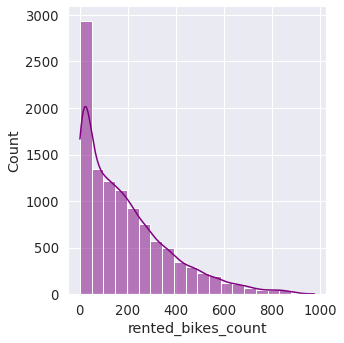

In [150]:
sns.displot(bike_df['rented_bikes_count'], color='purple', kde=True, bins=20);

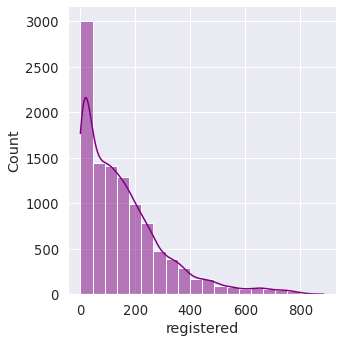

In [151]:
sns.displot(bike_df['registered'], color='purple', kde=True, bins=20);

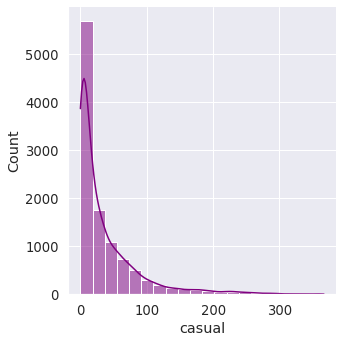

In [152]:
sns.displot(bike_df['casual'], color='purple', kde=True, bins=20);

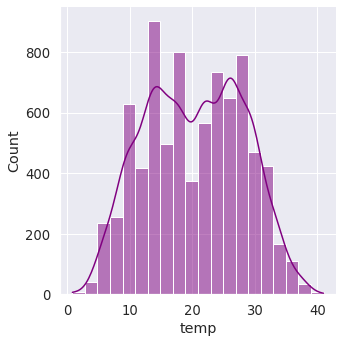

In [153]:
sns.displot(bike_df['temp'], color='purple', kde=True, bins=20);

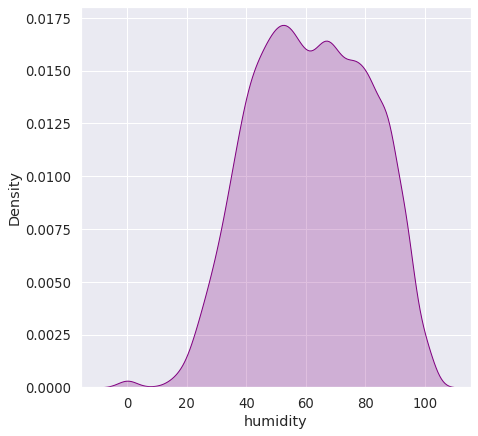

In [154]:
sns.kdeplot(bike_df['humidity'], color='purple', shade=True);

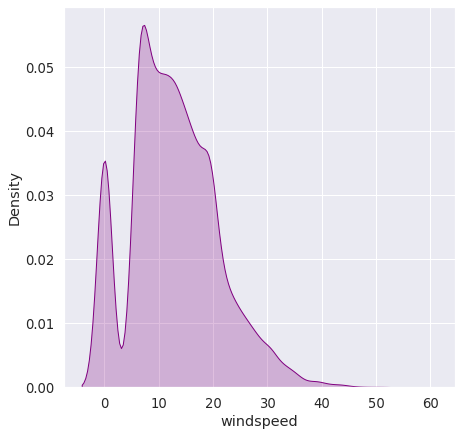

In [155]:
sns.kdeplot(bike_df['windspeed'], color='purple', shade=True);

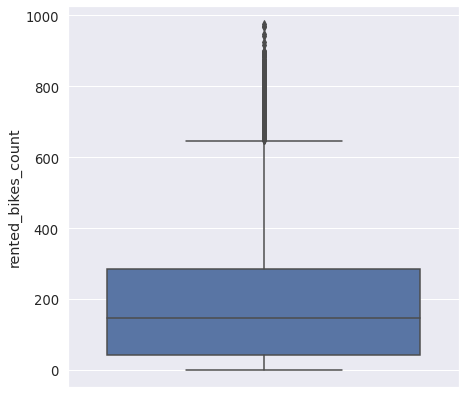

In [156]:
sns.boxplot(data=bike_df, y='rented_bikes_count');

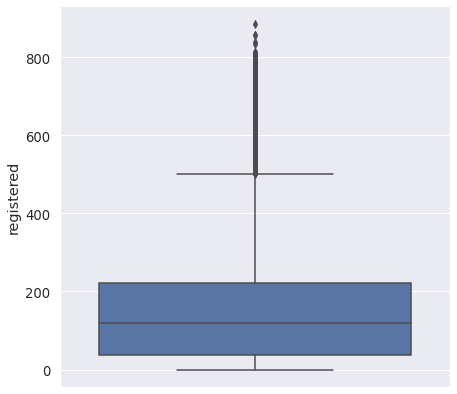

In [157]:
sns.boxplot(data=bike_df, y='registered');

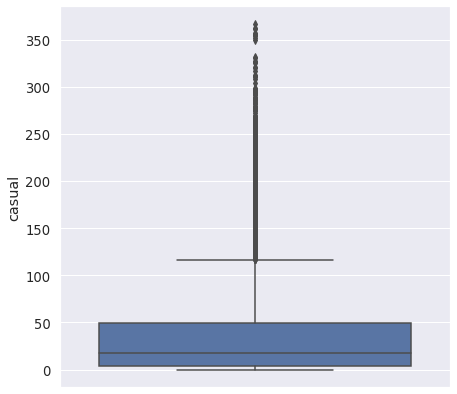

In [158]:
sns.boxplot(data=bike_df, y='casual');

### Bivariate Analysis
##### Numeric Features

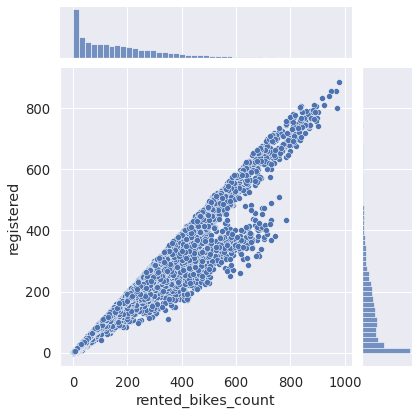

In [159]:
sns.jointplot(x='rented_bikes_count', y='registered', data=bike_df, kind='scatter');

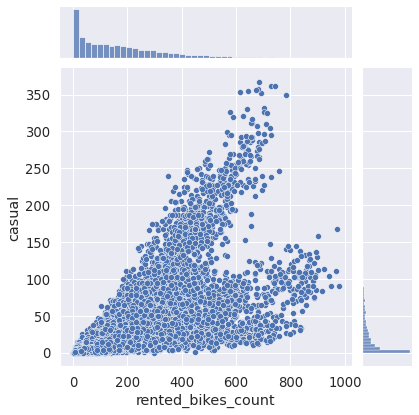

In [160]:
sns.jointplot(x='rented_bikes_count', y='casual', data=bike_df, kind='scatter');

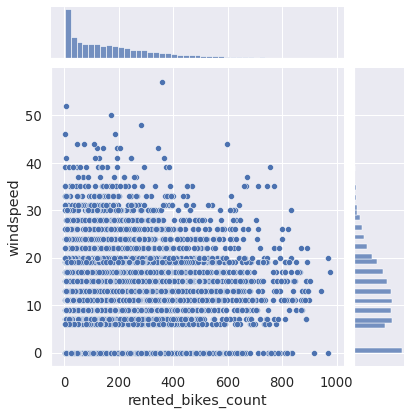

In [161]:
sns.jointplot(x='rented_bikes_count', y='windspeed', data=bike_df);

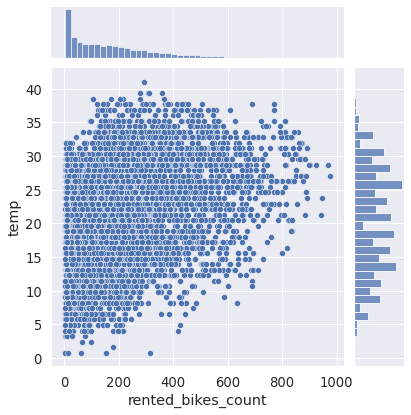

In [162]:
sns.jointplot(x='rented_bikes_count', y='temp', data=bike_df);

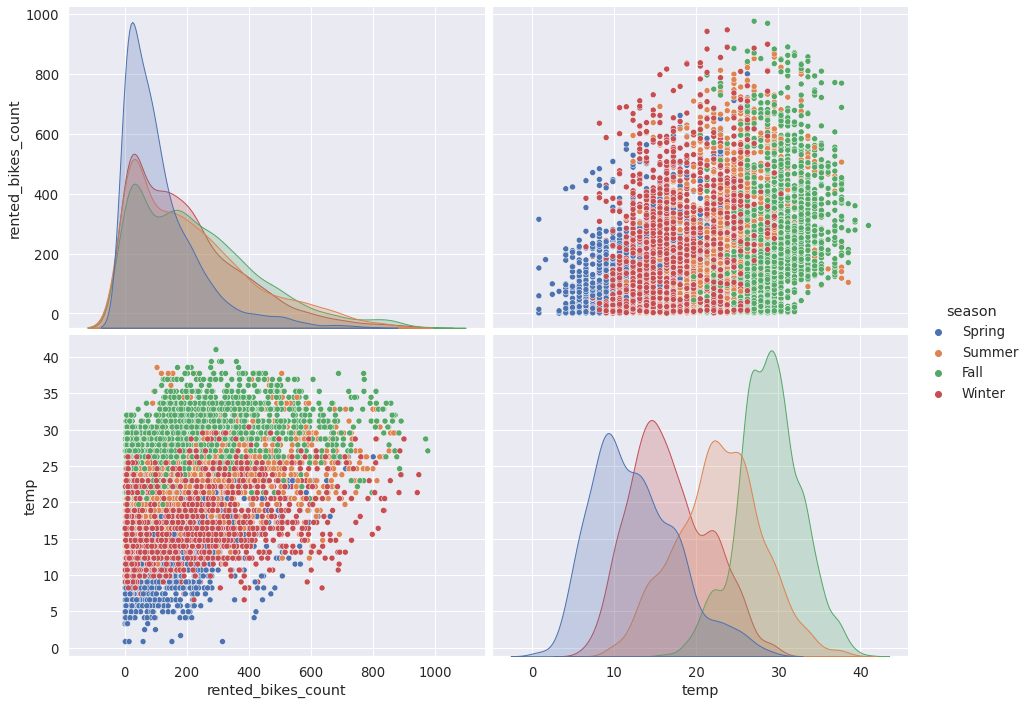

In [163]:
sns.pairplot(bike_df, vars=['rented_bikes_count','temp'], hue='season', aspect=1.3, height=5);

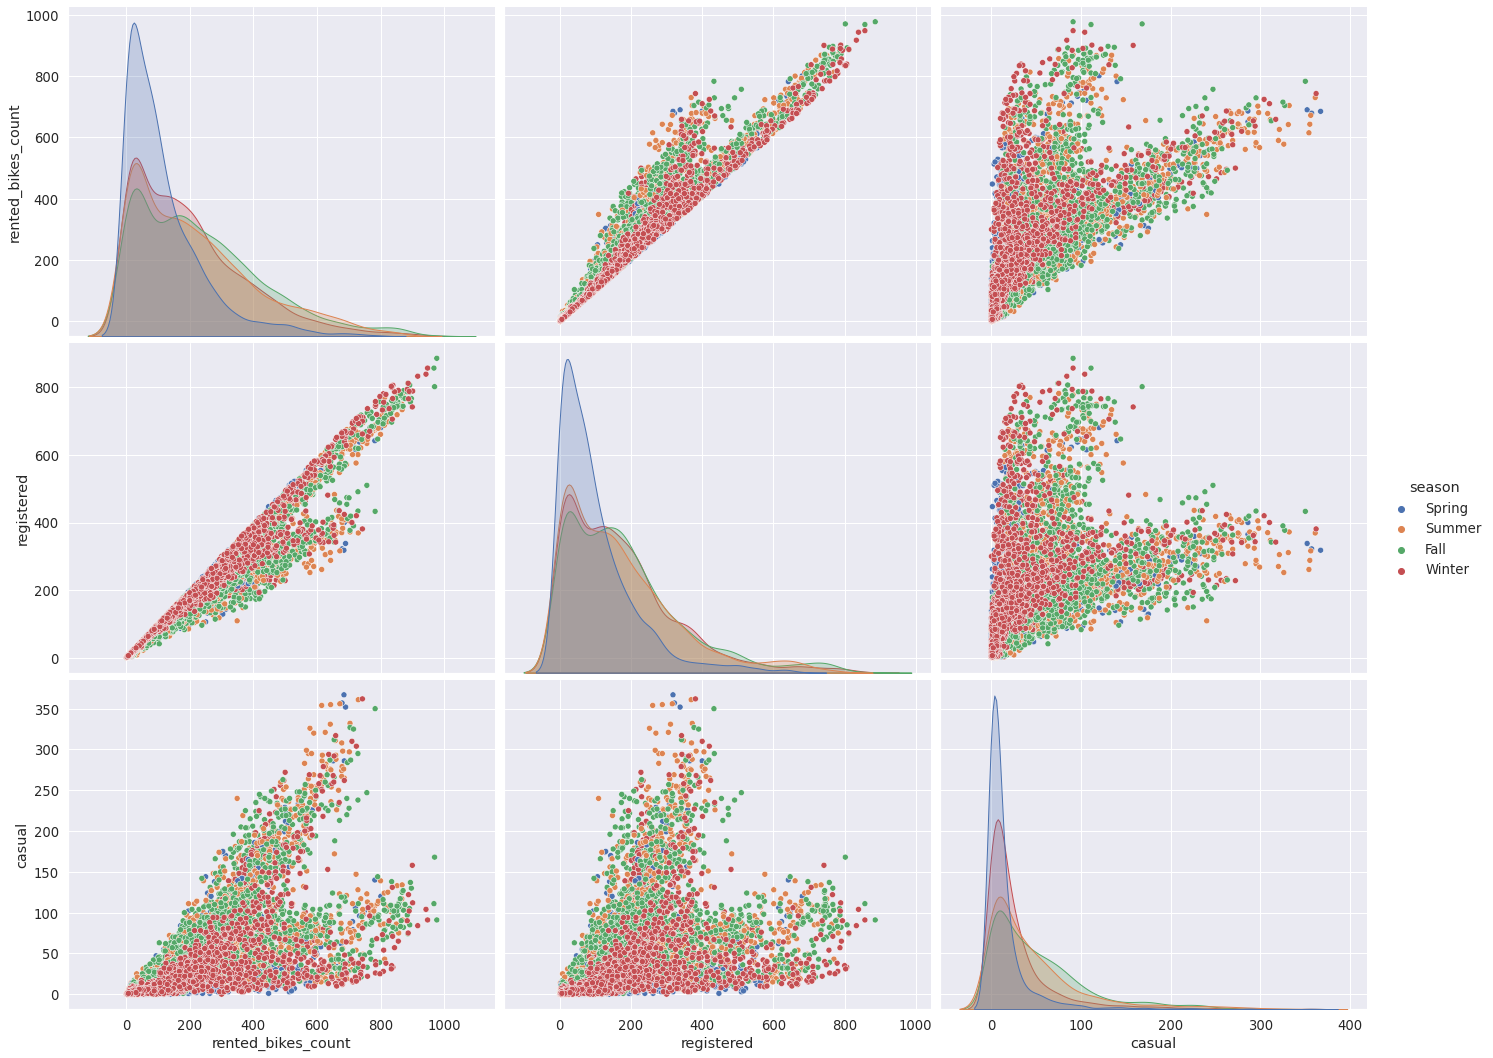

In [164]:
sns.pairplot(bike_df, vars=['rented_bikes_count','registered','casual'], hue='season', aspect=1.3, height=5);

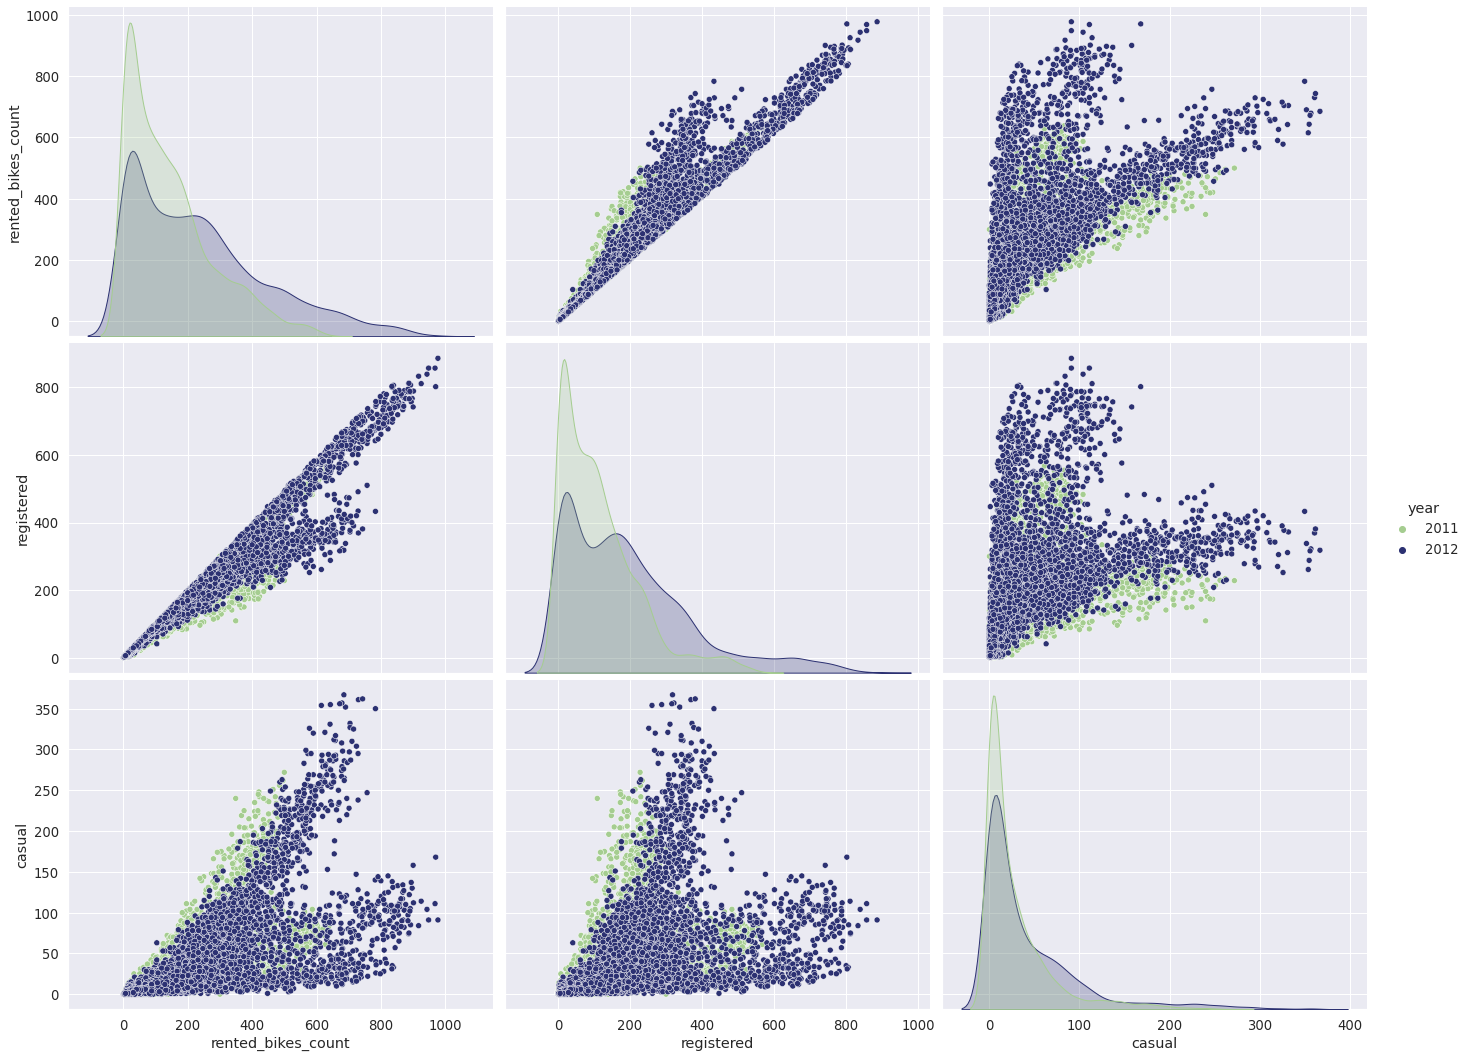

In [165]:
sns.pairplot(bike_df, vars=['rented_bikes_count','registered','casual'], hue='year', palette="crest", aspect=1.3, height=5);

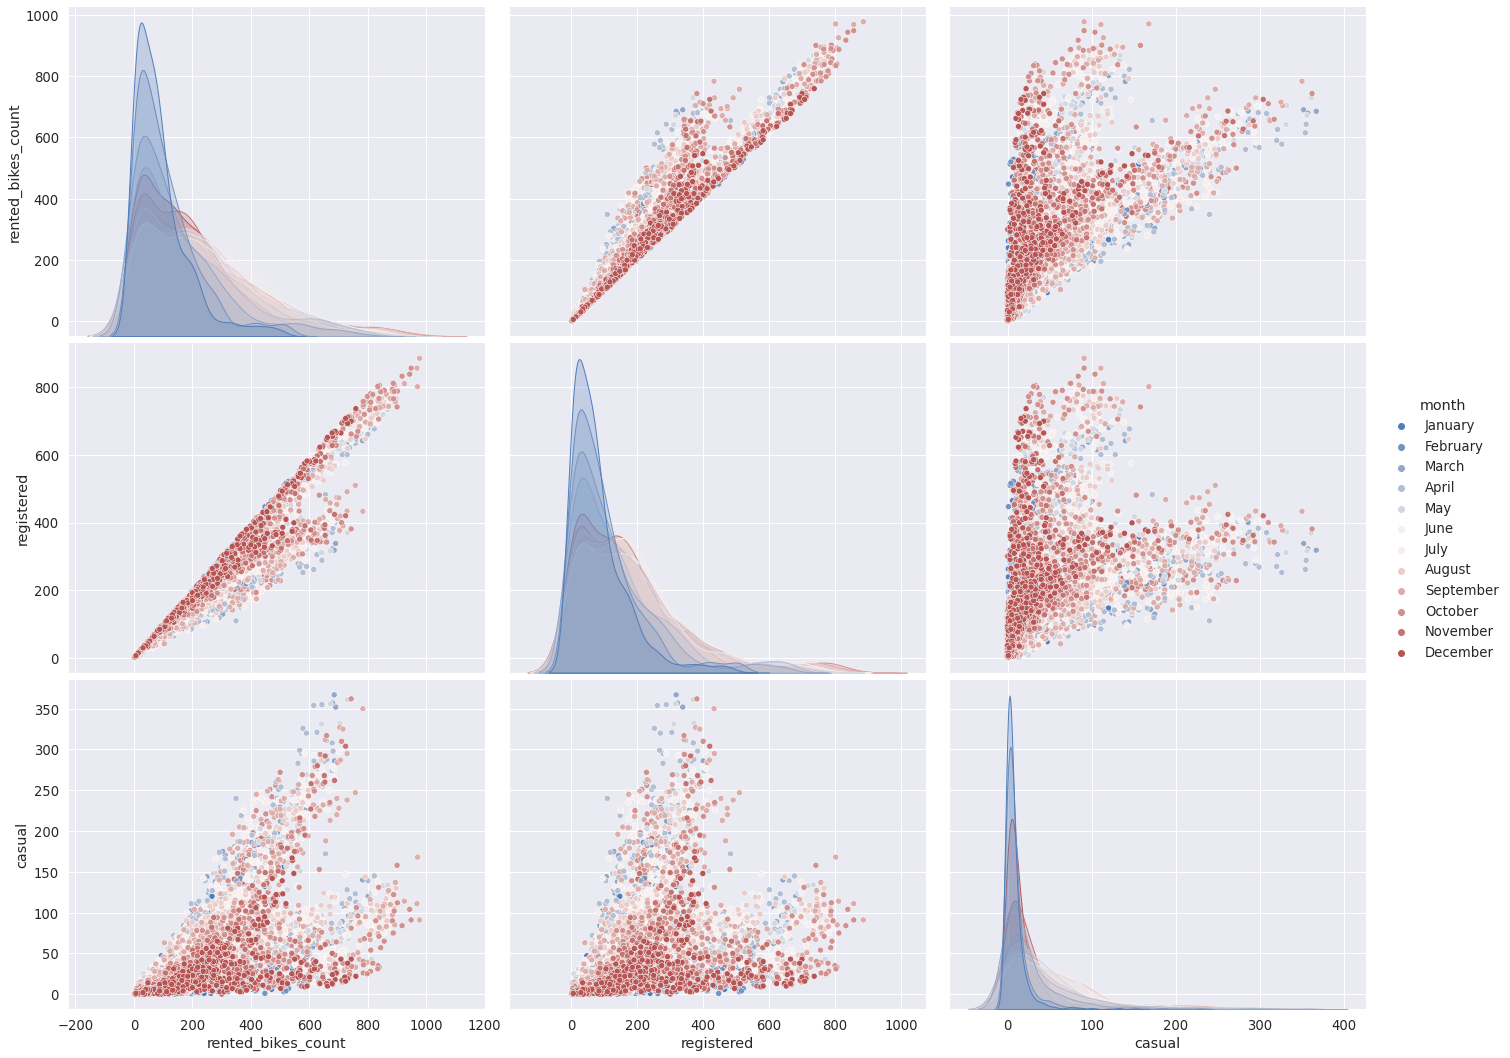

In [166]:
sns.pairplot(bike_df, vars=['rented_bikes_count','registered','casual'], hue='month', aspect=1.3, height=5, palette="vlag");

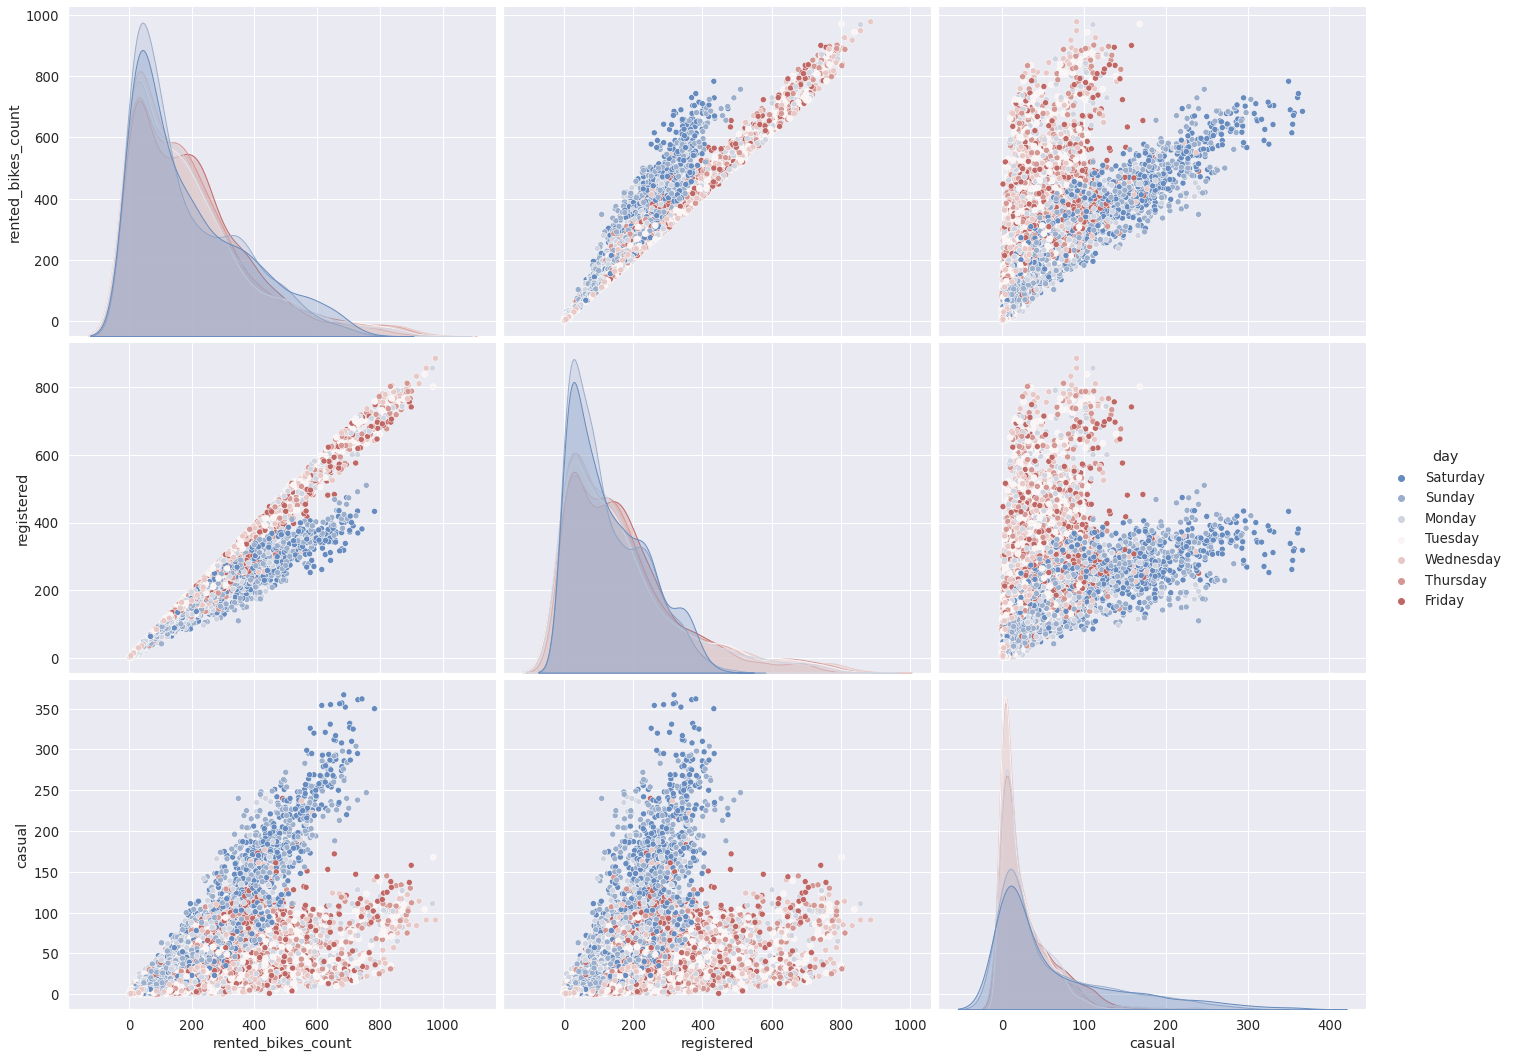

In [167]:
sns.pairplot(bike_df, vars=['rented_bikes_count','registered','casual'], hue='day', aspect=1.3, height=5, palette="vlag");

### Univariate Analysis
##### Categorical Features

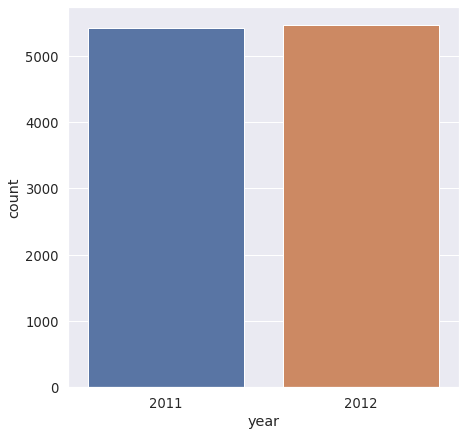

In [168]:
sns.countplot(x='year', data=bike_df);

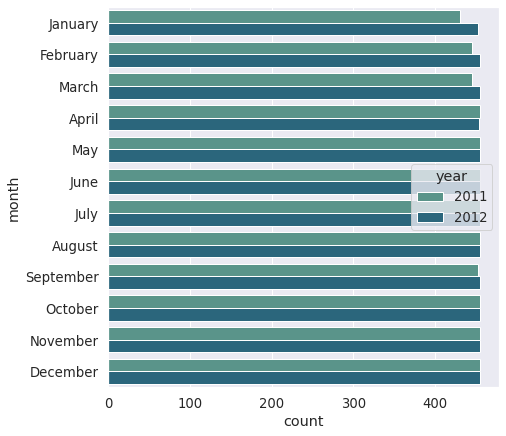

In [215]:
sns.countplot(y='month', data=bike_df, palette="crest", hue="year");

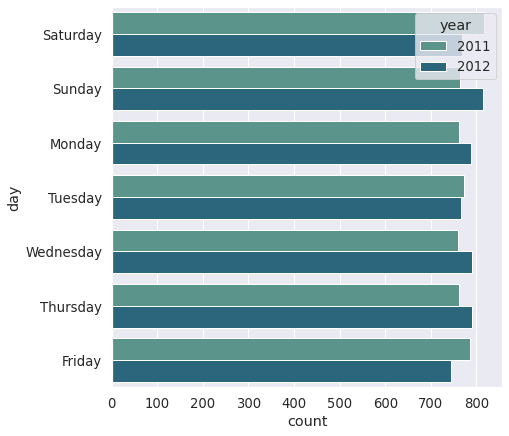

In [214]:
sns.countplot(y='day', data=bike_df, palette="crest", hue="year");

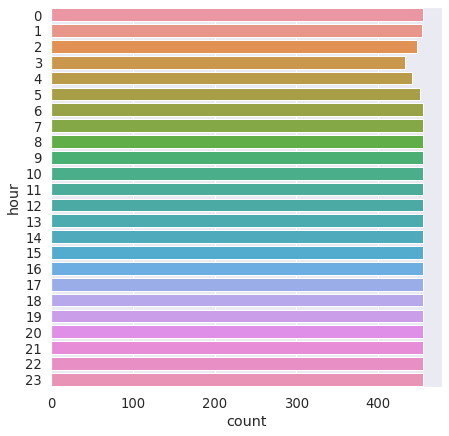

In [199]:
sns.countplot(y='hour', data=bike_df);

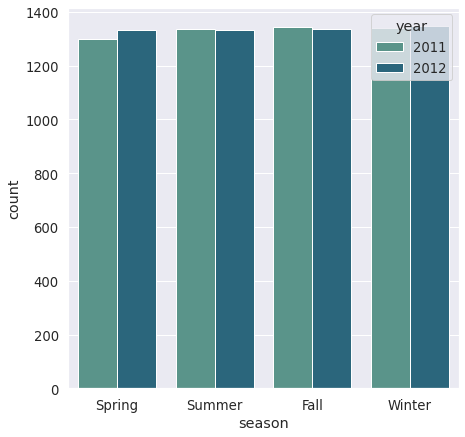

In [216]:
sns.countplot(x='season', data=bike_df, palette="crest", hue="year");

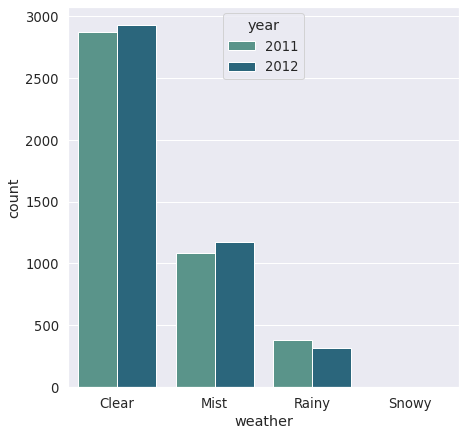

In [219]:
sns.countplot(x='weather', data=bike_df, palette="crest", hue="year");

### bivariate Analysis
##### Categorical Features

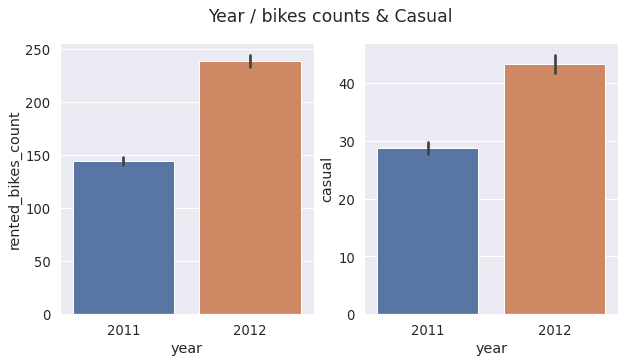

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Year / bikes counts & Casual') 
sns.barplot(ax=axes[0], data=bike_df, x='year', y='rented_bikes_count')
sns.barplot(ax=axes[1], data=bike_df, x='year', y='casual');

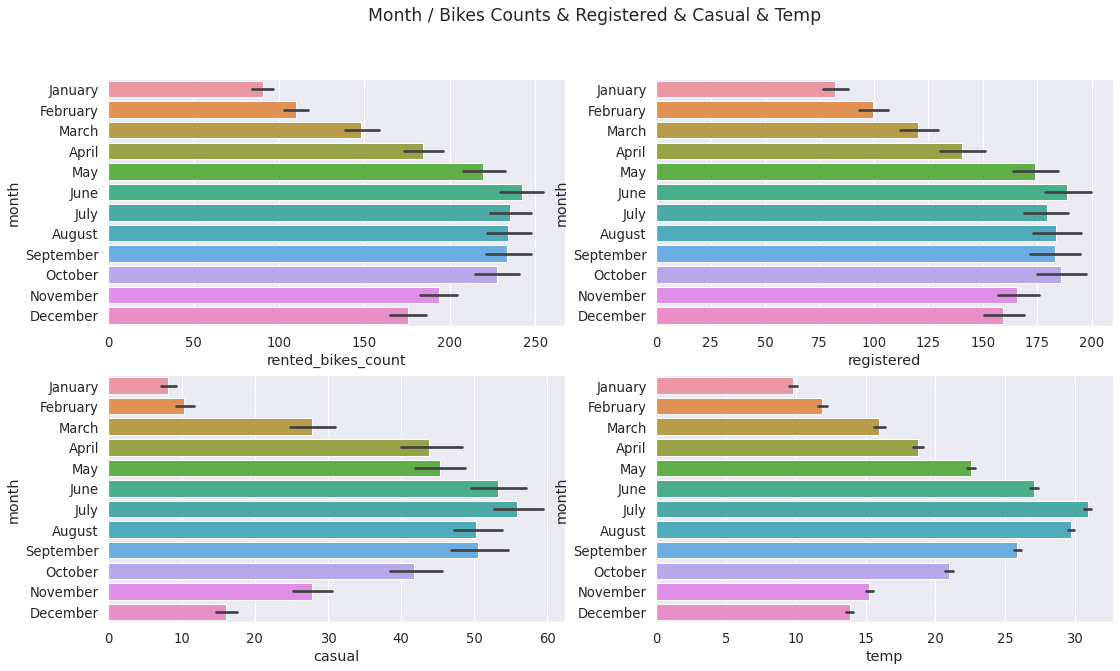

In [174]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10)) 
fig.suptitle('Month / Bikes Counts & Registered & Casual & Temp') 
sns.barplot(ax=axes[0, 0], data=bike_df, x='rented_bikes_count', y='month')
sns.barplot(ax=axes[0, 1], data=bike_df, x='registered', y='month');
sns.barplot(ax=axes[1, 0], data=bike_df, x='casual', y='month');
sns.barplot(ax=axes[1, 1], data=bike_df, x='temp', y='month');

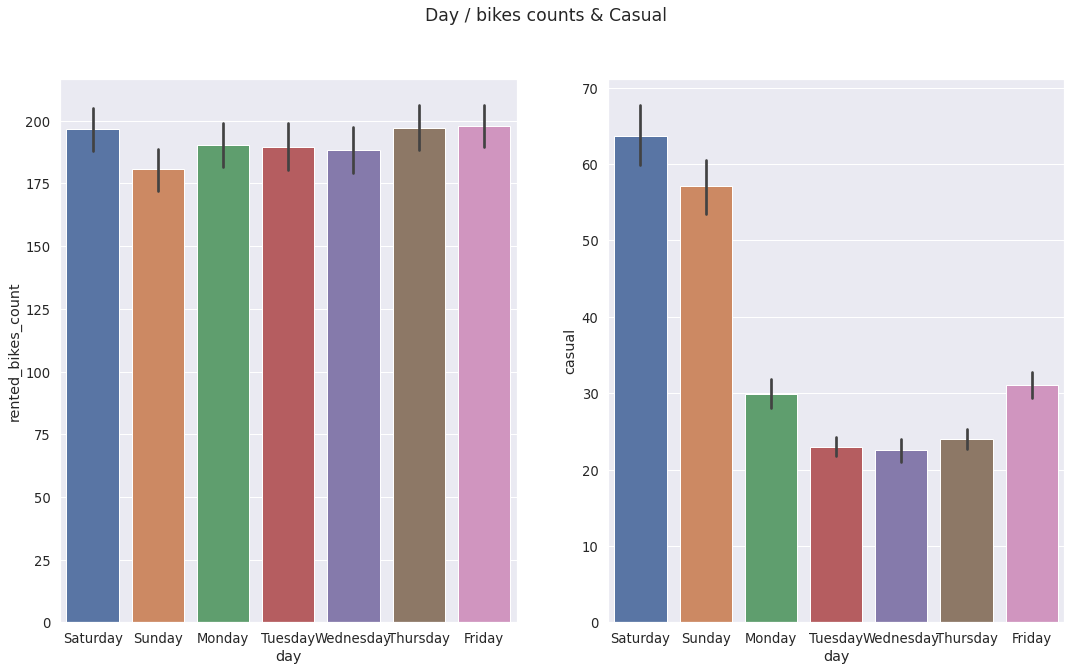

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10)) 
fig.suptitle('Day / bikes counts & Casual') 
sns.barplot(ax=axes[0], data=bike_df, x='day', y='rented_bikes_count')
sns.barplot(ax=axes[1], data=bike_df, x='day', y='casual');

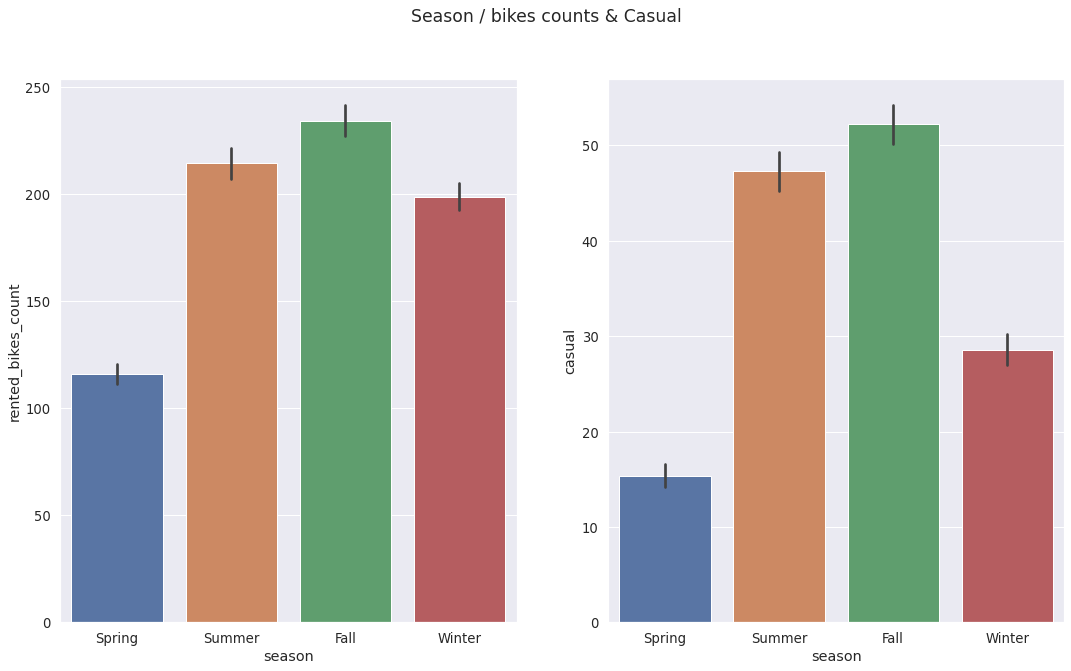

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10)) 
fig.suptitle('Season / bikes counts & Casual') 
sns.barplot(ax=axes[0], data=bike_df, x='season', y='rented_bikes_count')
sns.barplot(ax=axes[1], data=bike_df, x='season', y='casual');

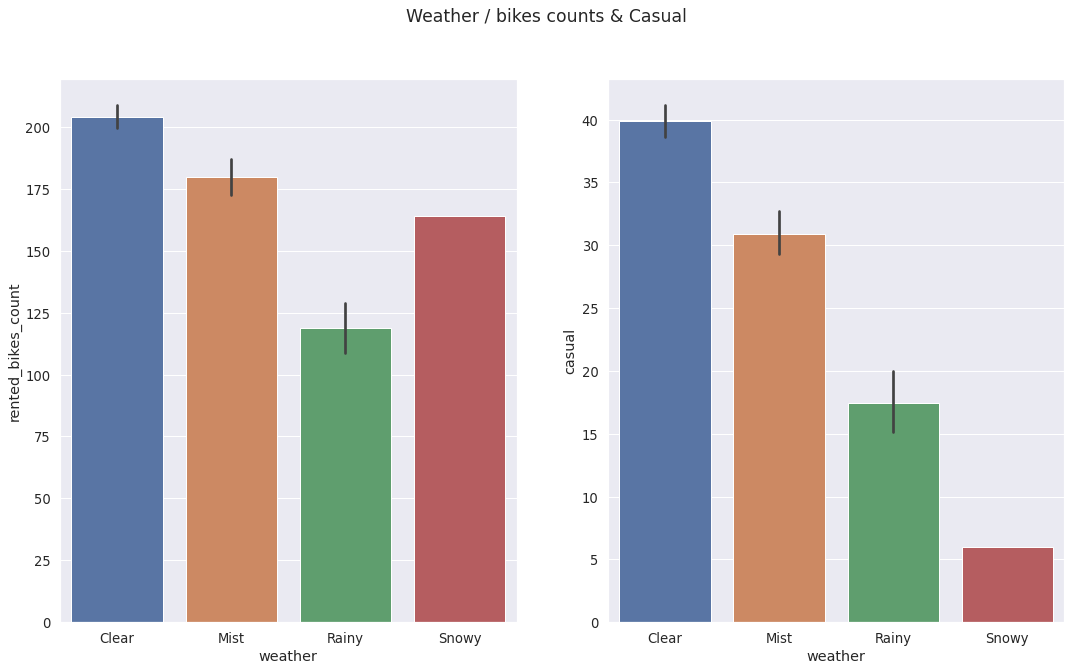

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10)) 
fig.suptitle('Weather / bikes counts & Casual') 
sns.barplot(ax=axes[0], data=bike_df, x='weather', y='rented_bikes_count')
sns.barplot(ax=axes[1], data=bike_df, x='weather', y='casual');

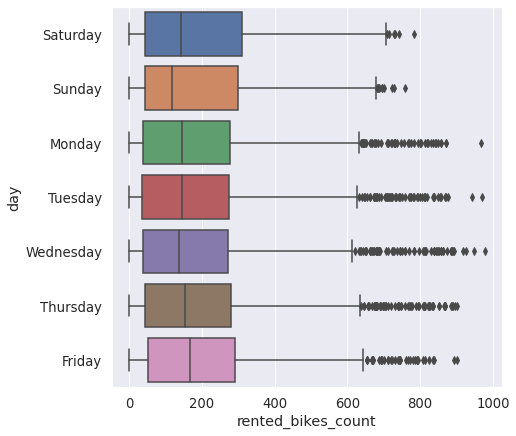

In [178]:
sns.boxplot(y="day", x="rented_bikes_count", data=bike_df);

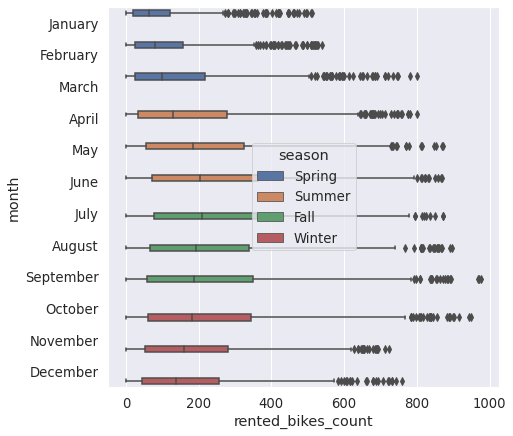

In [179]:
sns.boxplot(y="month", x="rented_bikes_count", hue="season",data=bike_df);

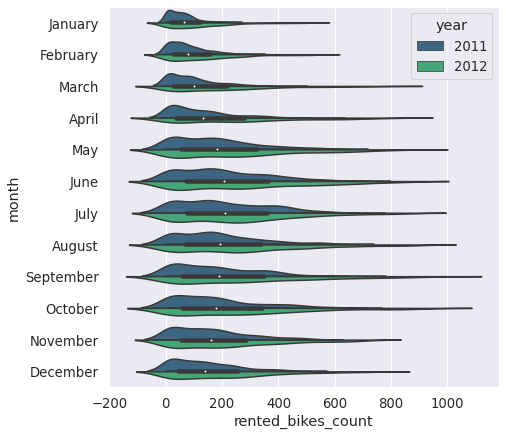

In [182]:
sns.violinplot(y="month", x="rented_bikes_count", data=bike_df, hue='year',split=True, palette='viridis');